In [312]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [313]:
df=pd.read_csv('athlete_events.csv')
region_df=pd.read_csv('noc_regions.csv')

In [314]:
df=df[df['Season']=='Summer']

In [315]:
df=df.merge(region_df,on='NOC',how='right')

In [316]:
df['region'].nunique()

206

In [317]:
df.isnull().sum()

ID             1
Name           1
Sex            1
Age         9178
Height     51770
Weight     53765
Team           1
NOC            0
Games          1
Year           1
Season         1
City           1
Sport          1
Event          1
Medal     188125
region        21
notes     217803
dtype: int64

In [318]:
df.duplicated().sum()

1385

In [319]:
df.drop_duplicates(inplace=True)

In [320]:
df.duplicated().sum()

0

In [321]:
pip install plotly

In [322]:
df.shape

(220819, 17)

In [323]:
#No of countries participate
df['region'].nunique()

206

In [324]:
df['Medal'].value_counts()

Medal
Gold      11455
Bronze    11405
Silver    11208
Name: count, dtype: int64

# One-Hot Encoding

In [325]:
df=pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)

In [326]:
df.sample(2)# This dataframe is the total merge data frame with region and medal column

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
69740,74622.0,douard Mantois,M,NaN,NaN,NaN,Nina Claire-2,FRA,1900 Summer,1900.0,Summer,Paris,Sailing,Sailing Mixed 1-2 Ton,NaN,France,NaN,False,False,False
27797,126235.0,Vasil Vetsev,M,22.0,164.0,62.0,Bulgaria,BUL,1996 Summer,1996.0,Summer,Atlanta,Gymnastics,Gymnastics Men's Individual All-Around,NaN,Bulgaria,NaN,False,False,False


In [327]:
medal_df=df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])


In [328]:
medal_tally=medal_df.groupby('region').sum()[['Bronze','Gold','Silver']].sort_values('Gold',ascending=False).reset_index()

In [329]:
medal_tally

,region,Bronze,Gold,Silver
0,USA,708,1035,802
1,Russia,487,592,498
2,Germany,491,444,457
3,UK,300,278,317
4,France,287,234,256
...,...,...,...,...
201,Lesotho,0,0,0
202,Liberia,0,0,0
203,Albania,0,0,0
204,Liechtenstein,0,0,0


In [330]:
medal_tally['Total_medal']=medal_tally['Bronze']+medal_tally['Gold']+medal_tally['Silver']

This below data frame should be showed if  I click on medal tally

In [331]:
medal_tally

,region,Bronze,Gold,Silver,Total_medal
0,USA,708,1035,802,2545
1,Russia,487,592,498,1577
2,Germany,491,444,457,1392
3,UK,300,278,317,895
4,France,287,234,256,777
...,...,...,...,...,...
201,Lesotho,0,0,0,0
202,Liberia,0,0,0,0
203,Albania,0,0,0,0
204,Liechtenstein,0,0,0,0


In [332]:
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,502.0,Ahmad Shah Abouwi,M,NaN,NaN,NaN,Afghanistan,AFG,1956 Summer,1956.0,Summer,Melbourne,Hockey,Hockey Men's Hockey,NaN,Afghanistan,NaN,False,False,False
1,1076.0,Jammal-ud-Din Affendi,M,28.0,NaN,NaN,Afghanistan,AFG,1936 Summer,1936.0,Summer,Berlin,Hockey,Hockey Men's Hockey,NaN,Afghanistan,NaN,False,False,False


## Fetching  the years

In [333]:
years=df['Year'].unique().tolist()
years.sort()

In [334]:
years.insert(0,'overall')

In [335]:
years

['overall',
 1896.0,
 1900.0,
 1904.0,
 1906.0,
 1908.0,
 1912.0,
 1920.0,
 1924.0,
 1928.0,
 1932.0,
 1936.0,
 1948.0,
 1952.0,
 1956.0,
 1960.0,
 1964.0,
 1968.0,
 1972.0,
 1976.0,
 1980.0,
 1984.0,
 1988.0,
 1992.0,
 1996.0,
 2000.0,
 2004.0,
 2008.0,
 2012.0,
 2016.0,
 nan]

## Fetching all the countries

In [336]:
country=df['region'].dropna().unique().tolist()

In [337]:
country.sort()

In [338]:
country.insert(0,'overall')


In [339]:
country

['overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

## We will create a function which take two variable year and country and return the medal tally

In [340]:
def fetch_medal_tally(df,year,country):
    medal_df=df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
    flag=0
    if year=='overall' and country=="overall" :
        temp=medal_df
    if year=='overall' and country!="overall" :
        flag=1
        temp=medal_df[medal_df['region']==country]
    if year!='overall' and country=="overall" :
         temp=medal_df[medal_df['Year']==int(year)]
    if year!='overall' and country!="overall" :
        temp=medal_df[(medal_df['Year']==int(year)) & (medal_df['region']==country)]
    #when year all with specific country
    if flag==1:
         x=temp.groupby('Year').sum()[['Bronze','Gold','Silver']].sort_values('Year',ascending=True).reset_index()
    else:
         x=temp.groupby('region').sum()[['Bronze','Gold','Silver']].sort_values('Gold',ascending=False).reset_index() 
    x['Total_medal']=x['Bronze']+x['Gold']+x['Silver']
    return x



In [341]:
fetch_medal_tally(df,'overall','India') # in this case i want to show all the year


,Year,Bronze,Gold,Silver,Total_medal
0,1900.0,0,0,2,2
1,1920.0,0,0,0,0
2,1924.0,0,0,0,0
3,1928.0,0,1,0,1
4,1932.0,0,1,0,1
5,1936.0,0,1,0,1
6,1948.0,0,1,0,1
7,1952.0,1,1,0,2
8,1956.0,0,1,0,1
9,1960.0,0,0,1,1


In [342]:
#fetch_medal_tally('overall','India') # in this case i want to show all the year

## Overall Analysis

#### no of editions
#### no of cities
#### no of events/sports
#### No of athelete
#### particpating natons

In [343]:
# how many times olympic happen
df["Year"].nunique()-1

28

In [344]:
df["City"].nunique()

23

In [345]:
df["Sport"].nunique()

52

In [346]:
df["Event"].nunique()

651

In [347]:
df["region"].nunique()

206

In [348]:
df["Name"].nunique()

115956

In [349]:
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,502.0,Ahmad Shah Abouwi,M,NaN,NaN,NaN,Afghanistan,AFG,1956 Summer,1956.0,Summer,Melbourne,Hockey,Hockey Men's Hockey,NaN,Afghanistan,NaN,False,False,False
1,1076.0,Jammal-ud-Din Affendi,M,28.0,NaN,NaN,Afghanistan,AFG,1936 Summer,1936.0,Summer,Berlin,Hockey,Hockey Men's Hockey,NaN,Afghanistan,NaN,False,False,False


## Participating Nations over time

In [350]:
#y-->no of participating nations, x--> year

In [351]:
nation_overtime=pd.DataFrame(df.drop_duplicates(['Year','region'])['Year'].value_counts()).reset_index()
nation_overtime.sort_values('Year',inplace=True)

In [352]:
nation_overtime

,Year,count
28,1896.0,12
22,1900.0,31
27,1904.0,14
26,1906.0,20
25,1908.0,22
23,1912.0,29
24,1920.0,29
21,1924.0,45
20,1928.0,46
19,1932.0,47


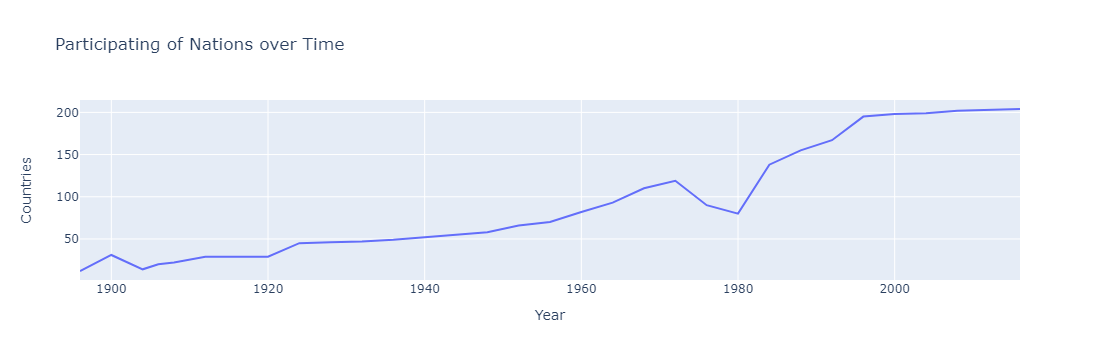

In [353]:
import plotly.express as px

fig = px.line(nation_overtime, x="Year", y="count", title='Participating of Nations over Time')
fig.layout.yaxis.title ='Countries'
fig.show()

## No of events over the time

In [354]:
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,502.0,Ahmad Shah Abouwi,M,NaN,NaN,NaN,Afghanistan,AFG,1956 Summer,1956.0,Summer,Melbourne,Hockey,Hockey Men's Hockey,NaN,Afghanistan,NaN,False,False,False
1,1076.0,Jammal-ud-Din Affendi,M,28.0,NaN,NaN,Afghanistan,AFG,1936 Summer,1936.0,Summer,Berlin,Hockey,Hockey Men's Hockey,NaN,Afghanistan,NaN,False,False,False


In [355]:
events_year=pd.DataFrame(df.drop_duplicates(['Year','Event'])['Year'].value_counts())
events_year.sort_values('Year',inplace=True)
events_year.reset_index(inplace=True)

In [356]:
events_year

,Year,count
0,1896.0,43
1,1900.0,90
2,1904.0,95
3,1906.0,74
4,1908.0,109
5,1912.0,107
6,1920.0,158
7,1924.0,131
8,1928.0,122
9,1932.0,131


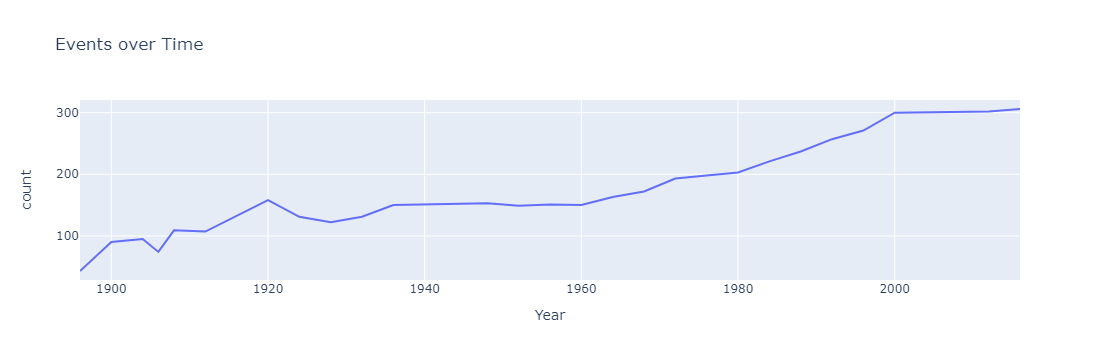

In [357]:
import plotly.express as px

fig = px.line(events_year, x="Year", y="count", title='Events over Time')
fig.show()

In [358]:
df.sample(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
210387,65482.0,Allan Sidney Kwartler,M,34.0,175.0,73.0,United States,USA,1952 Summer,1952.0,Summer,Helsinki,Fencing,"Fencing Men's Sabre, Team",NaN,USA,NaN,False,False,False
48779,82325.0,Brge Mortensen,M,26.0,NaN,NaN,Denmark,DEN,1948 Summer,1948.0,Summer,London,Cycling,"Cycling Men's Team Pursuit, 4,000 metres",NaN,Denmark,NaN,False,False,False
185208,83081.0,Henning Christian Gottfrid Mller,M,23.0,NaN,NaN,Sweden-1,SWE,1920 Summer,1920.0,Summer,Antwerpen,Tennis,Tennis Men's Doubles,NaN,Sweden,NaN,False,False,False


##  Heat Map

In [359]:
x=df.drop_duplicates(['Year','Sport','Event'])

In [360]:
x.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,502.0,Ahmad Shah Abouwi,M,NaN,NaN,NaN,Afghanistan,AFG,1956 Summer,1956.0,Summer,Melbourne,Hockey,Hockey Men's Hockey,NaN,Afghanistan,NaN,False,False,False
1,1076.0,Jammal-ud-Din Affendi,M,28.0,NaN,NaN,Afghanistan,AFG,1936 Summer,1936.0,Summer,Berlin,Hockey,Hockey Men's Hockey,NaN,Afghanistan,NaN,False,False,False
2,1101.0,Mohammad Anwar Afzal,M,NaN,NaN,NaN,Afghanistan,AFG,1948 Summer,1948.0,Summer,London,Football,Football Men's Football,NaN,Afghanistan,NaN,False,False,False
3,1745.0,Mohammad Aktar,M,17.0,156.0,48.0,Afghanistan,AFG,1980 Summer,1980.0,Summer,Moskva,Wrestling,"Wrestling Men's Light-Flyweight, Freestyle",NaN,Afghanistan,NaN,False,False,False
4,4628.0,Mohammad Daoud Anwary,M,22.0,NaN,NaN,Afghanistan,AFG,1964 Summer,1964.0,Summer,Tokyo,Wrestling,"Wrestling Men's Bantamweight, Freestyle",NaN,Afghanistan,NaN,False,False,False


<Axes: xlabel='Year', ylabel='Sport'>

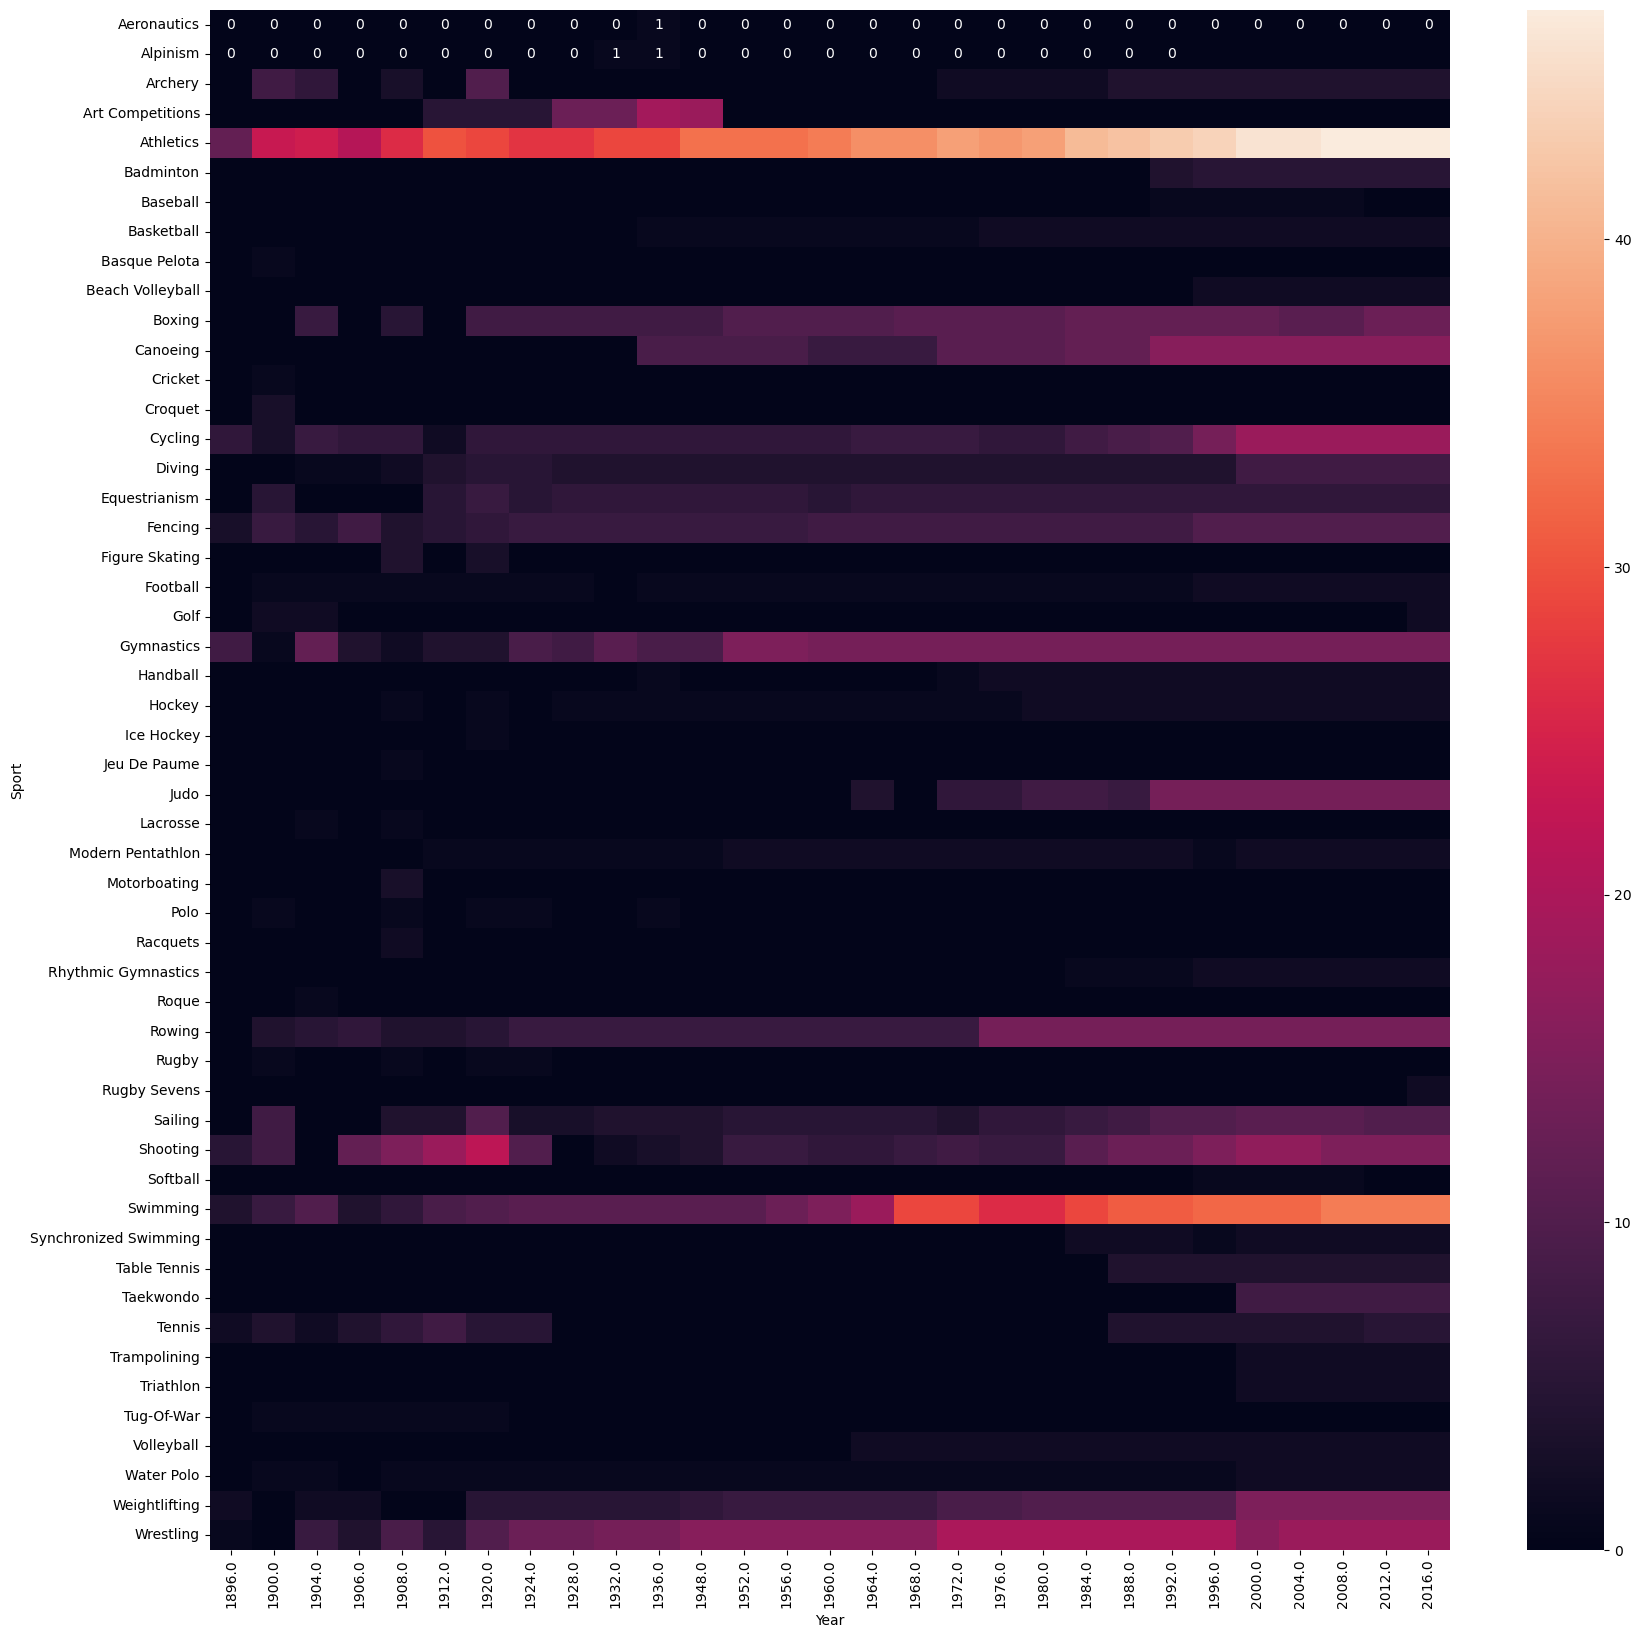

In [361]:
plt.figure(figsize=(20,20))
sns.heatmap(x.pivot_table(index="Sport",columns='Year',values='Event',aggfunc='count').fillna(0).astype("int"),annot=True)

# Successfulll athlete

In [362]:
def succesful_player(df,sport):
    temp=df.dropna(subset=["Medal"])
    temp=temp[temp['Sport']==sport]
    x=pd.DataFrame(temp['Name'].value_counts()).head(5).reset_index()
    x=x.rename(columns={'count':'Total Medal'})
    l = []
    for name in x['Name']:
        y = temp[temp['Name'] == name]['region'].tolist()
        l.append(y[0])
    x['Country'] = l
    return x

In [363]:
succesful_player(df,'Swimming')

,Name,Total Medal,Country
0,"Michael Fred Phelps, II",28,USA
1,"Dara Grace Torres (-Hoffman, -Minas)",12,USA
2,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,USA
3,Natalie Anne Coughlin (-Hall),12,USA
4,Ryan Steven Lochte,12,USA


In [364]:
df['Sport'].unique().tolist()

['Hockey',
 'Football',
 'Wrestling',
 'Athletics',
 'Taekwondo',
 'Judo',
 'Boxing',
 'Weightlifting',
 'Shooting',
 'Fencing',
 'Swimming',
 'Sailing',
 'Synchronized Swimming',
 'Triathlon',
 'Equestrianism',
 'Cycling',
 'Volleyball',
 'Handball',
 'Rowing',
 'Table Tennis',
 'Tennis',
 'Gymnastics',
 'Trampolining',
 'Badminton',
 'Canoeing',
 'Beach Volleyball',
 'Basketball',
 'Diving',
 'Rugby',
 'Rugby Sevens',
 'Polo',
 'Modern Pentathlon',
 'Archery',
 'Water Polo',
 'Art Competitions',
 'Golf',
 'Figure Skating',
 'Softball',
 'Baseball',
 'Rhythmic Gymnastics',
 'Tug-Of-War',
 'Ice Hockey',
 'Lacrosse',
 'Basque Pelota',
 'Cricket',
 'Croquet',
 'Motorboating',
 'Racquets',
 'Jeu De Paume',
 'Alpinism',
 nan,
 'Aeronautics',
 'Roque']

## Country wise medal tally per year( line plot )

In [365]:
df.dropna(subset=['Medal']) 

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
64,86313.0,Rohullah Nikpai,M,21.0,183.0,63.0,Afghanistan,AFG,2008 Summer,2008.0,Summer,Beijing,Taekwondo,Taekwondo Men's Flyweight,Bronze,Afghanistan,NaN,True,False,False
65,86313.0,Rohullah Nikpai,M,25.0,183.0,63.0,Afghanistan,AFG,2012 Summer,2012.0,Summer,London,Taekwondo,Taekwondo Men's Featherweight,Bronze,Afghanistan,NaN,True,False,False
130,12684.0,Jan D. Boersma,M,19.0,NaN,NaN,Netherlands Antilles,AHO,1988 Summer,1988.0,Summer,Seoul,Sailing,Sailing Mixed Windsurfer,Silver,Curacao,Netherlands Antilles,False,False,True
299,2794.0,Mohamed Allalou,M,26.0,174.0,63.0,Algeria,ALG,2000 Summer,2000.0,Summer,Sydney,Boxing,Boxing Men's Light-Welterweight,Bronze,Algeria,NaN,True,False,False
321,6815.0,Mohamed Bahari,M,20.0,180.0,75.0,Algeria,ALG,1996 Summer,1996.0,Summer,Atlanta,Boxing,Boxing Men's Middleweight,Bronze,Algeria,NaN,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222132,97036.0,"Christine Seraphine ""Chris"" Prinsloo",F,28.0,156.0,47.0,Zimbabwe,ZIM,1980 Summer,1980.0,Summer,Moskva,Hockey,Hockey Women's Hockey,Gold,Zimbabwe,NaN,False,True,False
222138,101386.0,Sonia Robertson (Chick-),F,33.0,168.0,60.0,Zimbabwe,ZIM,1980 Summer,1980.0,Summer,Moskva,Hockey,Hockey Women's Hockey,Gold,Zimbabwe,NaN,False,True,False
222152,115129.0,Anthea Dorine Stewart (Allin-),F,35.0,160.0,56.0,Zimbabwe,ZIM,1980 Summer,1980.0,Summer,Moskva,Hockey,Hockey Women's Hockey,Gold,Zimbabwe,NaN,False,True,False
222188,127168.0,Helen Volk,F,26.0,150.0,55.0,Zimbabwe,ZIM,1980 Summer,1980.0,Summer,Moskva,Hockey,Hockey Women's Hockey,Gold,Zimbabwe,NaN,False,True,False


In [366]:
medal_df=df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])


In [367]:
newdf=medal_df[medal_df['region']=='India']
newdf=newdf.groupby('Year').count()['Medal'].reset_index()

In [368]:
newdf['Year']=newdf['Year'].astype('int')

In [369]:
newdf

,Year,Medal
0,1900,2
1,1920,0
2,1924,0
3,1928,1
4,1932,1
5,1936,1
6,1948,1
7,1952,2
8,1956,1
9,1960,1


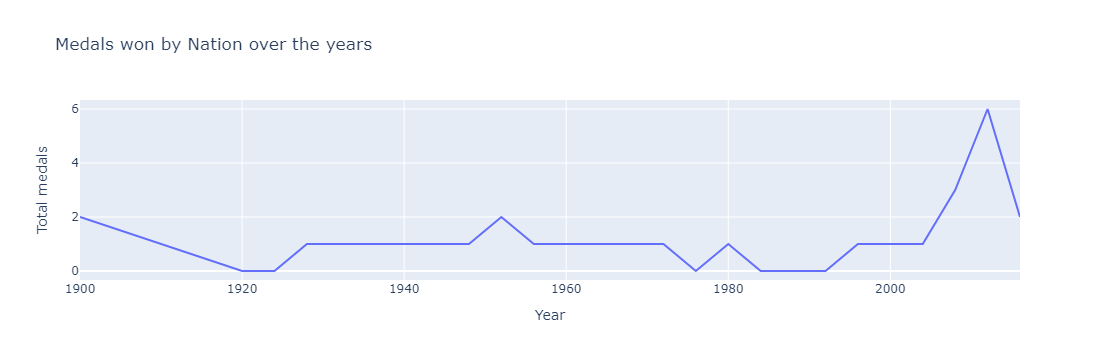

In [370]:
fig = px.line(newdf, x="Year", y="Medal", title='Medals won by Nation over the years')
fig.layout.yaxis.title ='Total medals'
fig.show()

## Generate heat map which showing no of medals won in every sport

In [371]:

medal_df=df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [372]:
x=medal_df.dropna(subset=['Medal'])

In [373]:
y=x[x['region']=='India']

In [374]:
y.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
108726,2699.0,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928.0,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
108728,2703.0,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964.0,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
108731,2864.0,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932.0,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False


<Axes: xlabel='Year', ylabel='Sport'>

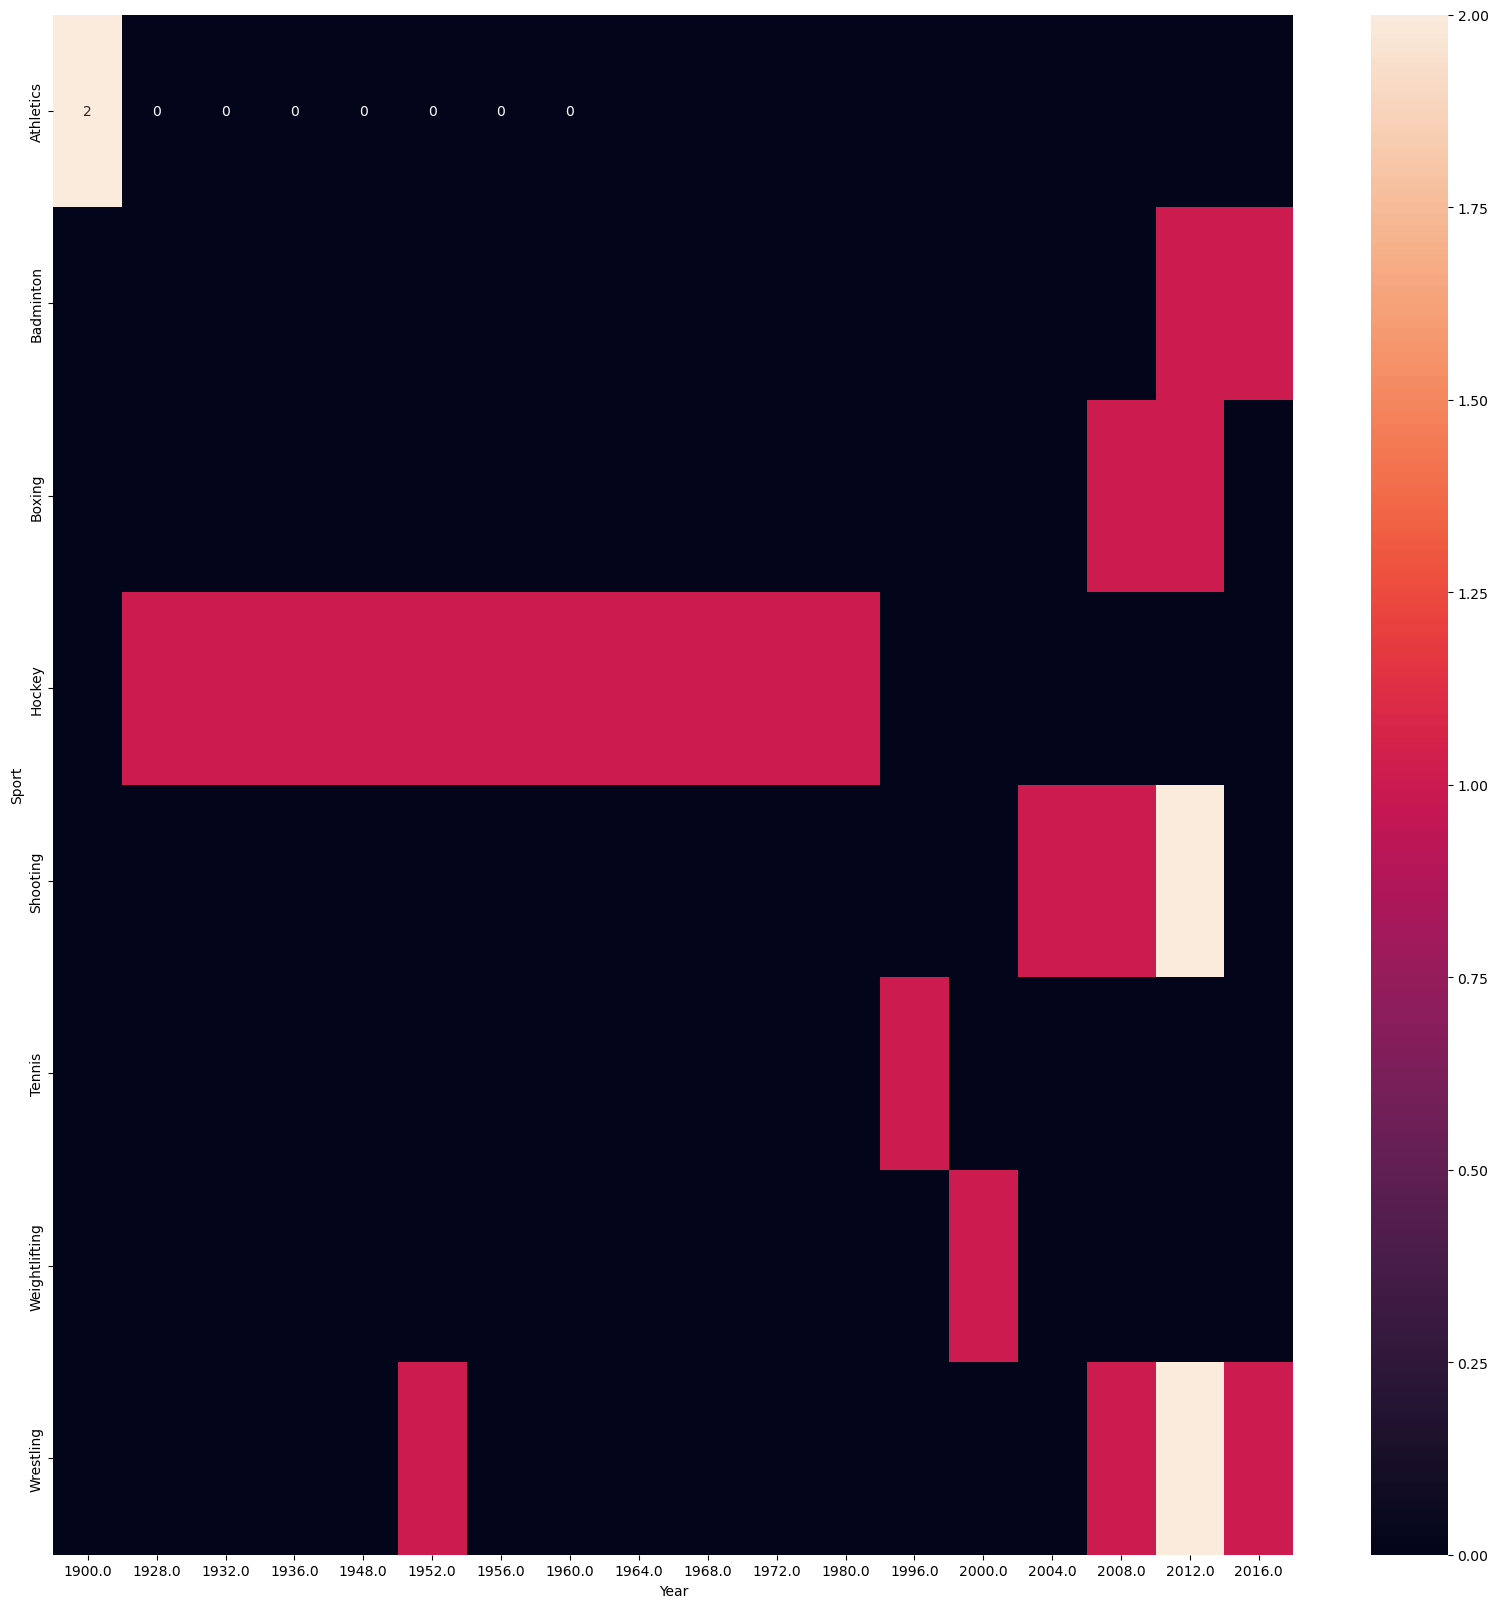

In [375]:
plt.figure(figsize=(20,20))
sns.heatmap(y.pivot_table(index="Sport",columns='Year',values='Event',aggfunc='count').fillna(0).astype("int"),annot=True)

## Most successfull top 10 Athletes:---->

In [376]:
y.sample(5)    

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
108911,21912.0,Leslie Walter Claudius,M,25.0,162.0,53.0,India,IND,1952 Summer,1952.0,Summer,Helsinki,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
108731,2864.0,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932.0,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
109478,97066.0,Norman Gilbert Pritchard (-Trevor),M,24.0,NaN,NaN,India,IND,1900 Summer,1900.0,Summer,Paris,Athletics,Athletics Men's 200 metres,Silver,India,NaN,False,False,True
108912,21912.0,Leslie Walter Claudius,M,29.0,162.0,53.0,India,IND,1956 Summer,1956.0,Summer,Melbourne,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
109882,111161.0,Vijender Kumar Singh,M,22.0,182.0,75.0,India,IND,2008 Summer,2008.0,Summer,Beijing,Boxing,Boxing Men's Middleweight,Bronze,India,NaN,True,False,False


In [377]:
top_players=y.groupby('Name').count()['Medal']

In [378]:
top_players=pd.DataFrame(top_players)

In [379]:
top_players

,Medal
Name,
Abhinav Bindra,1
Gagan Narang,1
Govinda Billimogaputtaswamy,1
"Joseph Anthony ""Joe"" Antic",1
Karnam Malleswari,1
Khashaba Dadasaheb Jahdav,1
Leander Adrian Paes,1
Leslie Walter Claudius,3
Mangte Chungneijang Mary Kom,1


In [380]:
top_players=top_players.sort_values(by='Medal',ascending=False).head(10).reset_index()

In [381]:
top_players

,Name,Medal
0,Leslie Walter Claudius,3
1,Richard James Allen,2
2,Sushil Kumar Solanki,2
3,Norman Gilbert Pritchard (-Trevor),2
4,Abhinav Bindra,1
5,Vijender Kumar Singh,1
6,Vijay Kumar,1
7,Vasudevan Bhaskaran,1
8,Syed Mushtaq Ali,1
9,Shaukat Ali,1


In [382]:
 l = []
for name in top_players['Name']:
        y = df[df['Name'] == name]['Event'].tolist()
        l.append(y[0])
top_players['Event']=l

In [383]:
top_players

,Name,Medal,Event
0,Leslie Walter Claudius,3,Hockey Men's Hockey
1,Richard James Allen,2,Hockey Men's Hockey
2,Sushil Kumar Solanki,2,"Wrestling Men's Lightweight, Freestyle"
3,Norman Gilbert Pritchard (-Trevor),2,Athletics Men's 60 metres
4,Abhinav Bindra,1,"Shooting Men's Air Rifle, 10 metres"
5,Vijender Kumar Singh,1,Boxing Men's Light-Welterweight
6,Vijay Kumar,1,"Shooting Men's Air Pistol, 10 metres"
7,Vasudevan Bhaskaran,1,Hockey Men's Hockey
8,Syed Mushtaq Ali,1,Hockey Men's Hockey
9,Shaukat Ali,1,Hockey Men's Hockey


In [384]:
l = []
for name in x['Name']:
        y = temp[temp['Name'] == name]['Event'].tolist()
        l.append(y[0])

IndexError: list index out of range

In [385]:
l

[]

## Athlete wise Analysis:

In [386]:
df.sample(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
201133,108530.0,V'iacheslav Mykhailovych Semenov,M,25.0,169.0,67.0,Soviet Union,URS,1972 Summer,1972.0,Summer,Munich,Football,Football Men's Football,Bronze,Russia,NaN,True,False,False
131363,38321.0,Gang Hye-Mi,F,22.0,173.0,62.0,South Korea,KOR,1996 Summer,1996.0,Summer,Atlanta,Volleyball,Volleyball Women's Volleyball,NaN,South Korea,NaN,False,False,False


In [387]:
import plotly.figure_factory as ff

In [388]:
athlete=df.drop_duplicates(subset=['Name','region'])

In [389]:
x1=athlete['Age'].dropna()
x2=athlete[athlete['Medal']=='Gold']['Age'].dropna()
x3=athlete[athlete['Medal']=='Silver']['Age'].dropna()
x4=athlete[athlete['Medal']=='Bronze']['Age'].dropna()

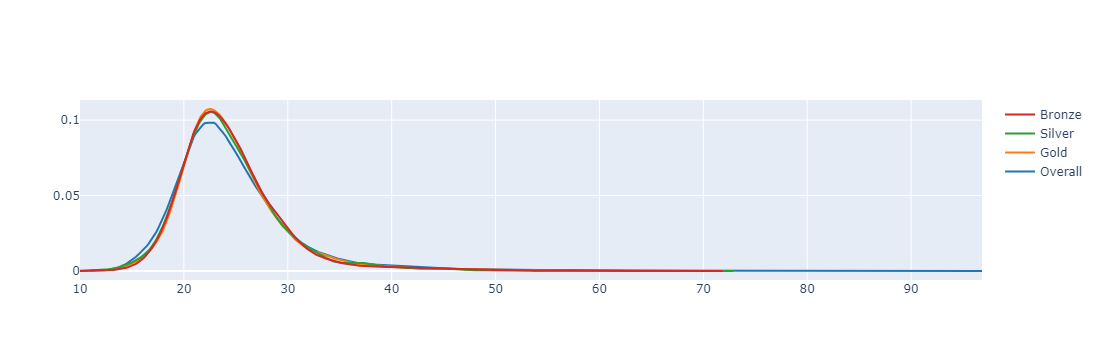

In [390]:
fig=ff.create_distplot([x1,x2,x3,x4],['Overall','Gold','Silver','Bronze'],show_hist=False,show_rug=False)
fig.show()

## Male and Female participation over the years:


In [418]:
male=athlete[athlete['Sex']=='M'].groupby('Year').count()['Sex'].reset_index()

In [419]:
female=athlete[athlete['Sex']=='F'].groupby('Year').count()['Sex'].reset_index()

In [424]:
female=female.rename(columns={'Sex':'Female'})
male=male.rename(columns={'Sex':'Male'})

In [429]:
temp_df=male.merge(female,on='Year')

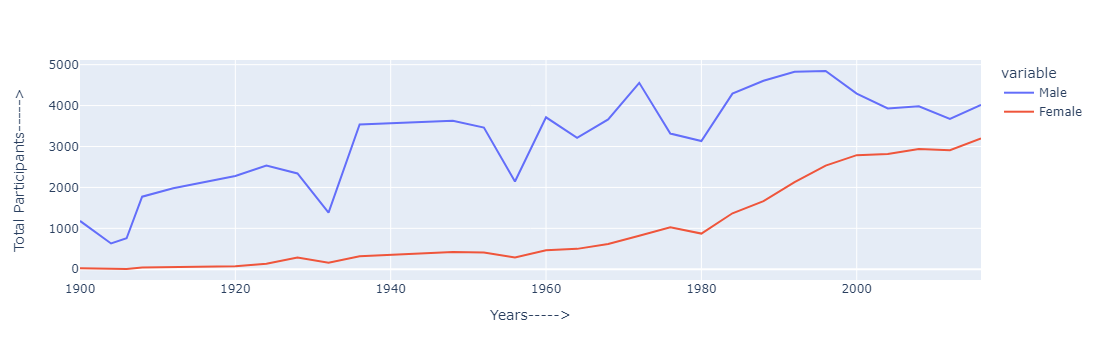

In [435]:
fig=px.line(temp_df,x='Year',y=['Male','Female'])
fig.layout.yaxis.title ='Total Participants----->'
fig.layout.xaxis.title ='Years----->'
fig.show()